# Imported Libraries

In [1]:
import numpy as np                            #Importing the numerical python (numpy) library
import pandas as pd                               #Importing pandas libraries for analysing and manipulating data
import seaborn as sn                              #for plotting the heatmap of the weather variables
import matplotlib.pyplot as plt                   #for plotting various graphs such as scatter plot
import seaborn as sns                             #for plotting the heatmap of the weather variables
%matplotlib inline               
sns.set_theme(style = "darkgrid")                 #setting the background for any plot in program
plt.rcParams["figure.figsize"] = (15, 10)         #Creating a default size for graph or plot
import warnings                                   #Import warning library to help ignore warnings                   
warnings.filterwarnings('ignore')                 #Ignore warnings
import scipy.stats as stats                #Scipy library for creating regression model
import statsmodels.api as sm                      #Statsmodels library for performing statistical operation
from statsmodels.distributions.empirical_distribution import ECDF #statsmodel to compute ECDF
from statsmodels.tsa.stattools import acf
from statsmodels.graphics import tsaplots
import math
from arch.unitroot import VarianceRatio
from sklearn.metrics import mean_absolute_error as mae
from statsmodels.tsa.arima.model import ARIMA
import itertools
from statsmodels.tsa.stattools import adfuller

# Question 1

In [2]:
windData = pd.read_csv("WindGeneration.csv", index_col=0, parse_dates=True) #Load the csv file into a dataframe using pandas read_csv function

#windData.info()

windDataInterpolate = windData.interpolate()

windDataInterpolate


,Time,Wind Generation
Date,,
2014-01-01,1,1190.1
2014-01-01,2,1186.6
2014-01-01,3,1174.3
2014-01-01,4,1146.7
2014-01-01,5,1156.8
...,...,...
2014-12-31,20,996.8
2014-12-31,21,1031.8
2014-12-31,22,1218.0


In [3]:
#Combine the Date and time columns to get a date/timestamp

windDataInterpolate['DateWithTimeStamp'] = pd.to_datetime(windDataInterpolate.index) + windDataInterpolate.Time.astype('timedelta64[h]')

windDataSetIndex = windDataInterpolate.set_index(['DateWithTimeStamp'])

windDataSetIndex

,Time,Wind Generation
DateWithTimeStamp,,
2014-01-01 01:00:00,1,1190.1
2014-01-01 02:00:00,2,1186.6
2014-01-01 03:00:00,3,1174.3
2014-01-01 04:00:00,4,1146.7
2014-01-01 05:00:00,5,1156.8
...,...,...
2014-12-31 20:00:00,20,996.8
2014-12-31 21:00:00,21,1031.8
2014-12-31 22:00:00,22,1218.0


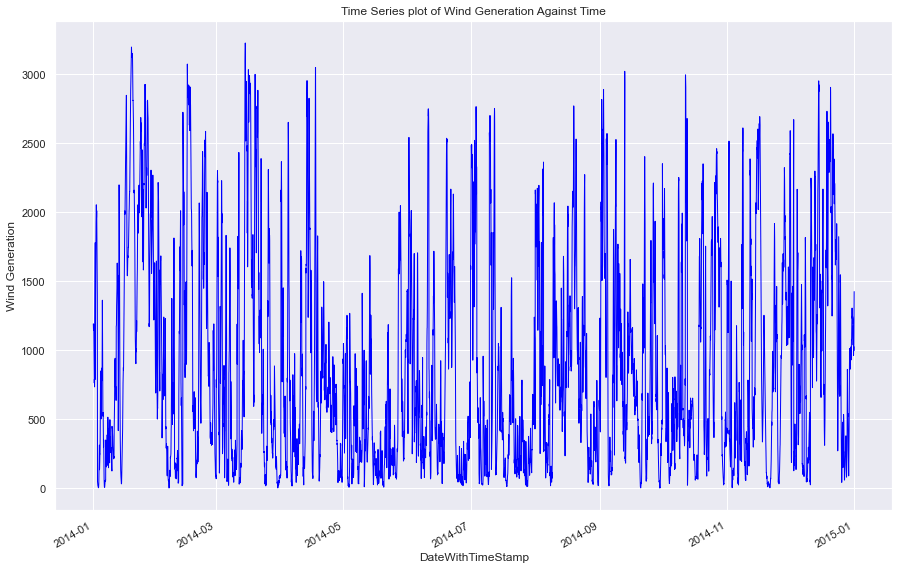

In [4]:
#Plot of Wind Generation against Timestamp

windDataSetIndex['Wind Generation'].plot(linewidth=1, color='blue') #Selecting the vertical axis for the plot

plt.title("Time Series plot of Wind Generation Against Time")

plt.ylabel("Wind Generation")

plt.show()

# Daily, Weekly, Monthly and Quartely Time Series Plot

In [5]:
#Using the process of resampling to get the daily wind generation from the  dataset

dailyDataColums = ['Wind Generation'] #Selecting the Wind Gerneration Column in to a list

dailyMeanFreq = windDataSetIndex[dailyDataColums].resample('D').mean() #Compute the daily wind generation using resample

dailyMeanFreq #Show the dataframe for the daily wind generation

,Wind Generation
DateWithTimeStamp,
2014-01-01,1064.878261
2014-01-02,1689.525000
2014-01-03,116.866667
2014-01-04,508.941667
2014-01-05,774.491667
...,...
2014-12-28,378.591667
2014-12-29,509.945833
2014-12-30,1018.108333


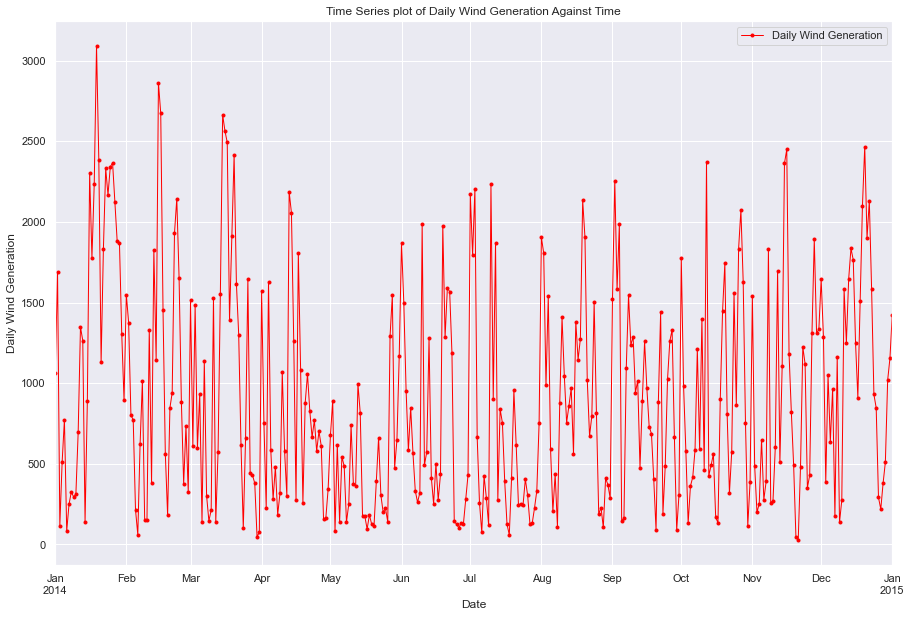

In [6]:
#Plot the graph of the daily wind generation to check pattern for intra-annual seasonality

dailyMeanFreq['Wind Generation'].plot(linewidth=1, color='red', marker='.', linestyle='-', label='Daily Wind Generation') #Selecting the vertical axis for the plot

plt.title("Time Series plot of Daily Wind Generation Against Time") #Show plot title 

plt.ylabel("Daily Wind Generation") #Show title of the vertical axis on the plot

plt.xlabel("Date") #Show title of the horizontal axis on the plot

plt.legend()

plt.show()

In [7]:
#Using the process of resampling to get the weekly wind generation from the  dataset

weeklyDataColums = ['Wind Generation'] #Selecting the Wind Gerneration Column in to a list

weeklyMeanFreq = windDataSetIndex[weeklyDataColums].resample('W').mean() #Compute the weekly wind generation using resample function

weeklyMeanFreq #Show the dataframe for the weeky wind generation from the dataset

,Wind Generation
DateWithTimeStamp,
2014-01-05,828.974790
2014-01-12,472.533929
2014-01-19,1671.536310
2014-01-26,2079.293452
2014-02-02,1571.577381
2014-02-09,518.819048
2014-02-16,1482.142262
2014-02-23,1151.378571
2014-03-02,872.204762


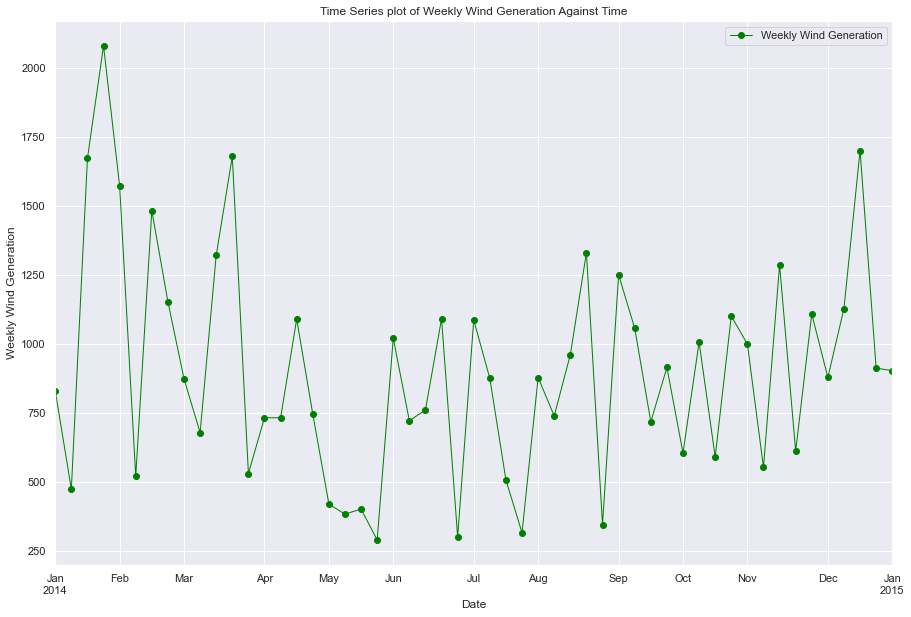

In [8]:
#Plot the graph of the weekly wind generation to check pattern for intra-annual seasonality

weeklyMeanFreq['Wind Generation'].plot(linewidth=1, color='green', marker='o', linestyle='-', label='Weekly Wind Generation') #Selecting the vertical axis for the plot

plt.title("Time Series plot of Weekly Wind Generation Against Time") #Show plot title 

plt.ylabel("Weekly Wind Generation") #Show the title of vertical axis on the plot

plt.xlabel("Date") #Show the title of horizontal axis on the plot

plt.legend()

plt.show()

In [9]:
#Using the process of resampling to get the monthly wind generation from the  dataset

monthlyDataColums = ['Wind Generation'] #Selecting the Wind Generation Column in to a list

monthlyMeanFreq = windDataSetIndex[monthlyDataColums].resample('M').mean() #Compute the weekly wind generation using resample function

monthlyMeanFreq #Show the dataframe for the monthly wind generation from the dataset

,Wind Generation
DateWithTimeStamp,
2014-01-31,1348.586945
2014-02-28,1034.561161
2014-03-31,1020.593952
2014-04-30,788.591389
2014-05-31,484.729032
2014-06-30,746.286806
2014-07-31,660.130780
2014-08-31,912.771909
2014-09-30,931.482222


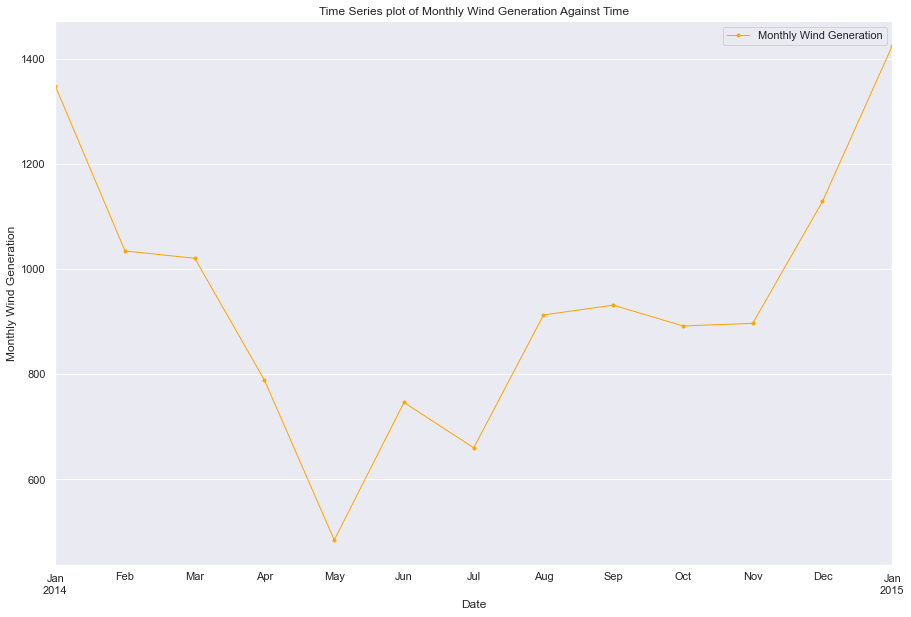

In [10]:
#Plot the graph of the weekly wind generation to check pattern for intra-annual seasonality

monthlyMeanFreq['Wind Generation'].plot(linewidth=1, color='orange', marker='.', linestyle='-', label='Monthly Wind Generation') #Selecting the vertical axis for the plot

plt.title("Time Series plot of Monthly Wind Generation Against Time") #Show plot title 

plt.ylabel("Monthly Wind Generation") #Show the title of vertical axis on the plot

plt.xlabel("Date") #Show the title of horizontal axis on the plot

plt.legend()

plt.show()

In [11]:
#Using the process of resampling to get the Quartely wind generation from the  dataset

quartelyDataColunms = ['Wind Generation'] #Selecting the Wind Generation Column in to a list

quartelyMeanFreq = windDataSetIndex[quartelyDataColunms].resample('Q').mean() #Compute the Quaterly wind generation using resample function

quartelyMeanFreq #Show the dataframe for the quartely wind generation from the dataset

,Wind Generation
DateWithTimeStamp,
2014-03-31,1137.817091
2014-06-30,671.131273
2014-09-30,833.744022
2014-12-31,973.330299
2015-03-31,1424.800000


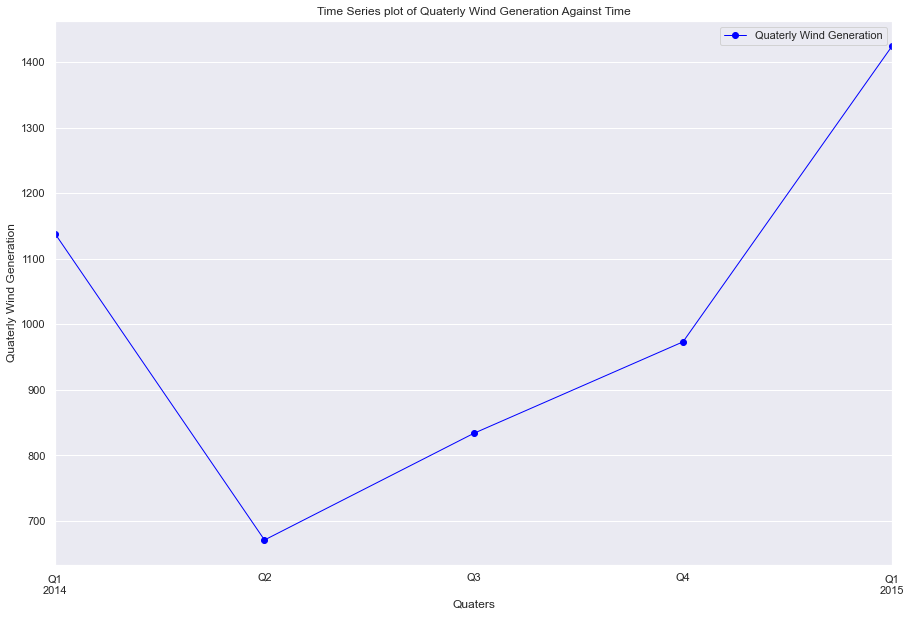

In [12]:
#Plot the graph of the Quaterly wind generation to check pattern for intra-annual seasonality

quartelyMeanFreq['Wind Generation'].plot(linewidth=1, color='blue', marker='o', linestyle='-', label='Quaterly Wind Generation') #Selecting the vertical axis for the plot

plt.title("Time Series plot of Quaterly Wind Generation Against Time") #Show plot title 

plt.ylabel("Quaterly Wind Generation") #Show the title of vertical axis on the plot

plt.xlabel("Quaters") #Show the title of horizontal axis on the plot

plt.legend()

plt.show()

# Question 2

In [13]:
#Calculate the change in wind generation over time as a percentage of the maximum generation

percentChange = [] #Empty list to store the percentage change

#iterate over the length of the wind generation dataframe to calculate the percentage of the maximum wind generation over time
for i in range(len(windDataSetIndex)):
    #Compute the percentage of the maximum winf generation over time using the below
    holdValue = 100 * ((windDataSetIndex['Wind Generation'][i] - windDataSetIndex['Wind Generation'][i-1])/max(windDataSetIndex['Wind Generation']))
    
    percentChange.append(holdValue) #append the values calculated into the empty list created above

percentChange.remove(-7.276616853723571) #Showing the values the percentage list



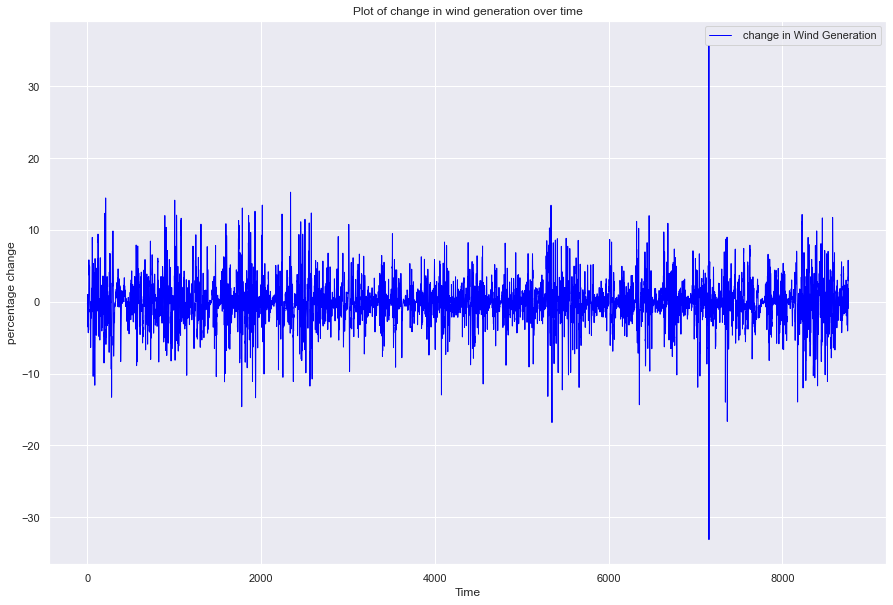

In [14]:
#plotting the graph of change in wind generation over time

plt.plot(percentChange, linewidth=1, color='blue', linestyle='-', label=' change in Wind Generation') #Plot the graph using the plot function

plt.title("Plot of change in wind generation over time") #Show plot title 

plt.ylabel("percentage change") #Show the title of vertical axis on the plot

plt.xlabel("Time") #Show the title of horizontal axis on the plot

plt.legend() #Show lengend

plt.show() #Display the graph


# Question 3

In [15]:
#Calculate the positive and negative ramps in wind power generation

#Create a list of positive and negative ramps

positiveRamps = []  #Positive ramps

negativeRamps = [] #Negative ramps

#iterate over the percentage change list to get the positive and negative ramps
for j in range(len(percentChange)):
    #Condition to check if the value in percentage list is positive or negative
    if(percentChange[j] >= 0):
        positiveRamps.append(percentChange[j]) #If value is positve append it to the positve ramp list
    else:
        negativeRamps.append(percentChange[j]) #Else append value to the negative ramp list


In [16]:
#Plot the CDF for a normal distribution with mean-zero and standard deviation from the observations.
mean = 0

standardDev = np.std(np.array(percentChange))

dataLen = len(percentChange)

vals = np.random.normal(mean, standardDev, dataLen)



In [17]:
positiveValues = []  #Positive ramps

negativeValues = [] #Negative ramps

#iterate over the percentage change list to get the positive and negative ramps
for j in range(len(vals)):
    #Condition to check if the value in percentage list is positive or negative
    if(vals[j] >= 0):
        positiveValues.append(vals[j]) #If value is positve append it to the positve ramp list
    else:
        negativeValues.append(vals[j]) #Else append value to the negative ramp list


In [18]:
empiricalCumDistribution = ECDF([positiveRamps, negativeRamps]) #Creating ECDF for both postive and negative ramps obtained above

cdfNormalDistribution = ECDF([positiveValues, negativeValues]) #Creating ECDF for both postive and negative ramps obtained above


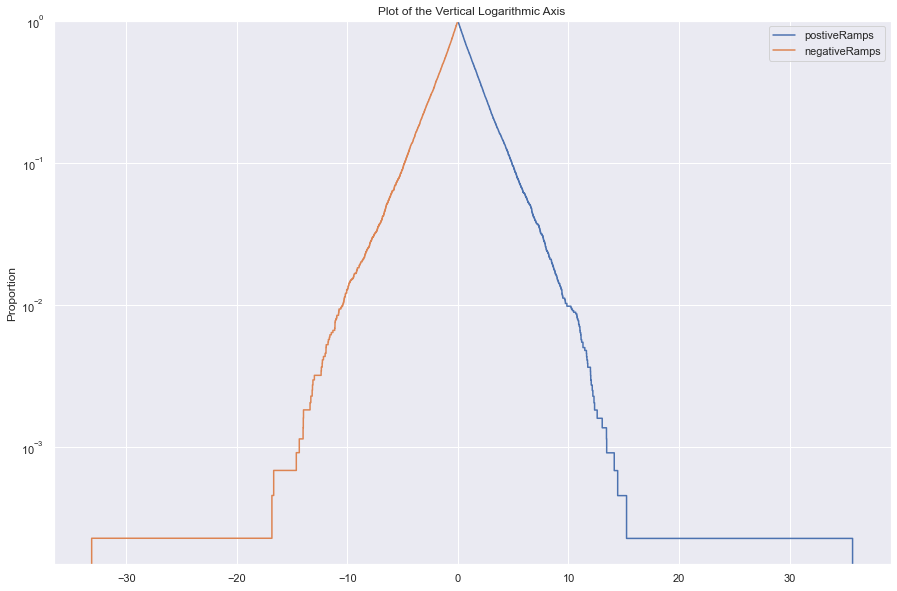

In [19]:
plt.title('Plot of the Vertical Logarithmic Axis')

sns.ecdfplot(data=positiveRamps, complementary=True, log_scale=(False, True))

sns.ecdfplot(data=negativeRamps, log_scale=(False, True))

plt.legend(labels=['postiveRamps', 'negativeRamps'])

plt.show()

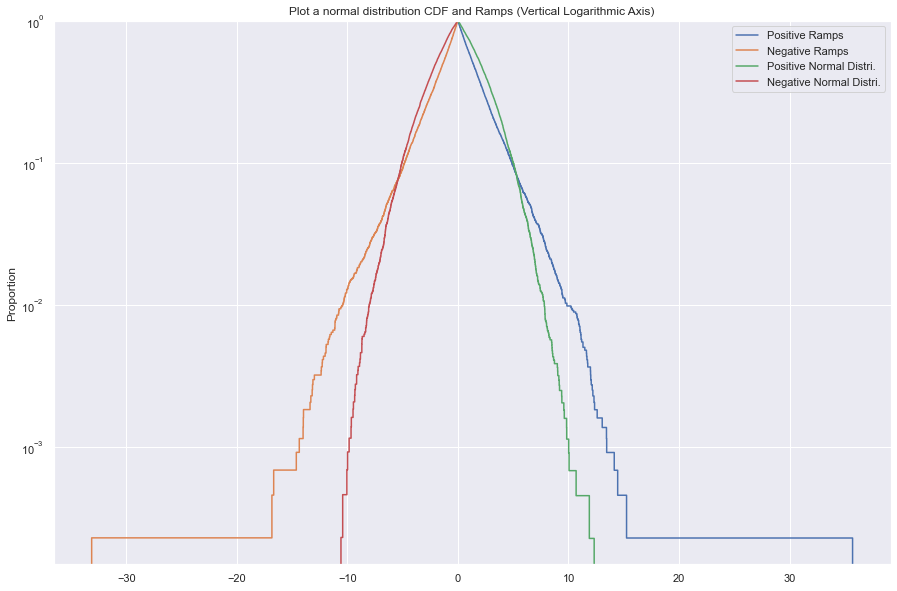

In [20]:
#Combine Plot of the CDF and Vertical Logarithmic Axis
plt.title('Plot a normal distribution CDF and Ramps (Vertical Logarithmic Axis)')

sns.ecdfplot(data=positiveRamps, complementary=True, log_scale=(False, True))

sns.ecdfplot(data=negativeRamps, log_scale=(False, True))

sns.ecdfplot(data=positiveValues, complementary=True, log_scale=(False, True))

sns.ecdfplot(data=negativeValues, log_scale=(False, True))

plt.legend(labels= ['Positive Ramps','Negative Ramps', 'Positive Normal Distri.', 'Negative Normal Distri.'])
plt.show()



# Question 4

In [21]:
#This cell compute variability of the wind generation over timescales
firstList = []

for i in range(1, 25):
    holdValue = 100 * ((windDataSetIndex['Wind Generation'] - windDataSetIndex['Wind Generation'].shift(i))/max(windDataSetIndex['Wind Generation']))
    empList = holdValue.to_list() #append the values calculated into the empty list created above
    firstList.append(empList)


In [22]:
#Compute the percentile 
j = 1
percentileList = []

for i in range(0, 24):
    holdPercentile = np.percentile(firstList[i][j:], [1, 5, 95, 99])
    j = j + 1
    
    percentileList.append(holdPercentile)


In [23]:
convertToArray = np.array(percentileList)

convertToDataFrame = pd.DataFrame(convertToArray, columns=['1st Percentile', '5th Percentile', '95th Percentile', '99th Percentile'])

convertToDataFrame

,1st Percentile,5th Percentile,95th Percentile,99th Percentile
0,-8.717864,-4.815217,4.880015,8.479072
1,-16.060489,-9.059807,9.193588,16.316922
2,-22.552862,-12.899485,12.910647,22.091896
3,-27.918398,-16.269300,16.294878,27.687884
4,-32.825262,-19.340237,19.259007,32.466237
5,-36.399485,-22.314597,22.052459,36.207261
6,-39.360947,-24.455881,24.272958,39.667514
7,-42.259472,-27.102065,26.159546,41.599275
8,-44.684380,-29.301792,27.864761,44.368140
9,-46.493210,-31.074440,29.758790,46.706393


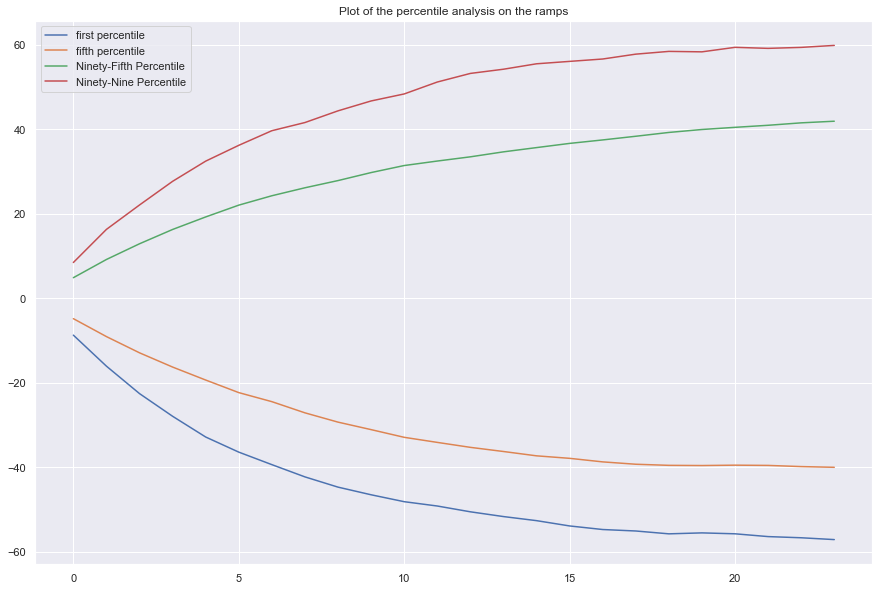

In [24]:
#Plot the result of the percentile
plt.title('Plot of the percentile analysis on the ramps') #title
plt.plot(convertToDataFrame['1st Percentile'], label='first percentile') #plot first percentile

plt.plot(convertToDataFrame['5th Percentile'], label='fifth percentile') #plot 5th percentile

plt.plot(convertToDataFrame['95th Percentile'], label='Ninety-Fifth Percentile') #plot 95 percentile

plt.plot(convertToDataFrame['99th Percentile'], label='Ninety-Nine Percentile') #plot 99 percentile

plt.legend()

plt.show()

# Question 5

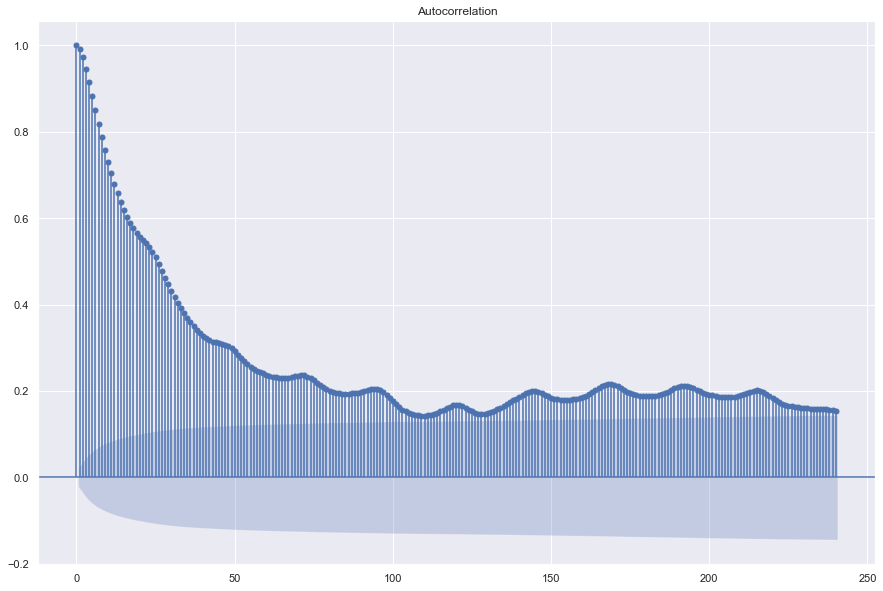

In [25]:
#Plot Autocorrelation using the plot acf library

tsaplots.plot_acf(windDataSetIndex['Wind Generation'], lags=240) #Compute the autocorrelation with lag 240

plt.show() #Show plot

# Question 6

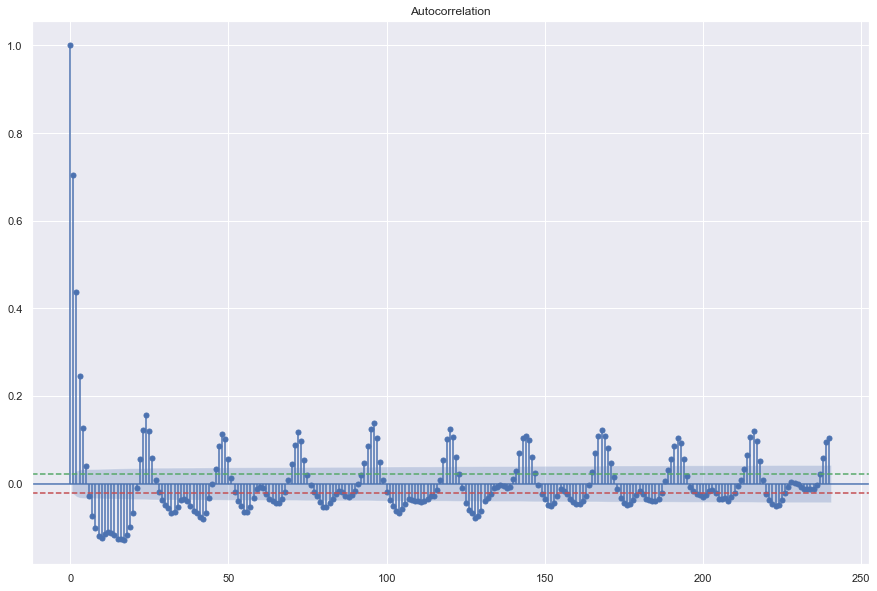

In [26]:
#This cell compute the  statistical significance using  the confidence interval and plot the  graph with lines

percentChangeLength = len(percentChange) #get length of the percentage change

positiveConfInterval = 1.96 * (1/ math.sqrt(percentChangeLength)) #positive interval

negativeConfInterval = -1.96 * (1/ math.sqrt(percentChangeLength)) #negative interval

tsaplots.plot_acf(percentChange, lags=240) #plot the autocorrelation

plt.axhline(y=positiveConfInterval, color='g', linestyle='--', label ="Positive Confidence Interval") #positive interval line

plt.axhline(y=negativeConfInterval, color='r', linestyle='--', label ="Negative Confidence Interval") #Negative interval line

plt.show() #Show graph

# Question 7

In [27]:
#This cell compute  the variance test ratio using the arch library
vr = VarianceRatio(windDataSetIndex['Wind Generation'], lags=240)

vr.summary() #Show the summary

Test Statistic,-2.558
P-value,0.011
Lags,240


In [28]:
#The code in this cell help to determine the mean aversion or reversion of the wind power generation
vrAdfuller = adfuller(windDataSetIndex['Wind Generation'], maxlag=240) #Call adfuller function on wind generation

print('ADF Statistic: %f' % vrAdfuller[0]) #Print t-stats

print('p-value: %f' % vrAdfuller[1]) #Print pvalue

print('Critical Values:') #Critical values

for key, value in vrAdfuller[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.132624
p-value: 0.000012
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


# Question 8

In [29]:
#Calculating the moving average
movingAverageList = []

for i in range(1, 25):
    
    movAverageValues = windDataSetIndex['Wind Generation'].rolling(i).mean() #Compute Moving averages
    
    convToList = movAverageValues.to_list() #Convert to list
    
    movingAverageList.append(convToList) #Append moving average in a list

movingAverageList

convertToArray = np.array(movingAverageList) #Convert to array

where_are_NaNs = np.isnan(convertToArray) #Check for nan values 

convertToArray[where_are_NaNs] = 0 #Set nan to zero


In [30]:
#Calculate the absolute mean error
AbsMeanErrorList = [] #MAE List
for i in range(0, 24):
    AbsMeanError = mae(convertToArray[i], windDataSetIndex['Wind Generation']) #Compute MAE
    AbsMeanErrorList.append(AbsMeanError)  #Append MAE in List

print(f'The Absolute Mean Error between the SMA and Wind Power:{AbsMeanErrorList}') #Print MAE

The Absolute Mean Error between the SMA and Wind Power:[0.0, 33.382471461187215, 62.86293378995434, 89.39071347031964, 113.50287671232876, 135.5138926940639, 155.78285225048924, 174.58115724885846, 191.8615474378488, 207.69734132420092, 222.12505188875053, 235.40405917047184, 247.84681067790657, 259.39654843444225, 270.06914992389653, 279.9369941495434, 289.12357238785927, 297.7328570522577, 305.64494592645997, 312.8542305936074, 319.4559795607741, 325.48077314238276, 331.0720274965257, 336.4262685502283]


# Question 9

In [31]:
persistenceList = [] #Empty list

for i in range(1, 25):
    
    persistenceValue = windDataSetIndex['Wind Generation'].shift(i) #Calculate the persistence using shift function
    
    convToList = persistenceValue.to_list() #Covert to list
    
    persistenceList.append(convToList) #Append in the outer list

convertpersistenceToArray = np.array(persistenceList) #Convert to array

where_are_NaNs = np.isnan(convertpersistenceToArray) #Check for nan

convertpersistenceToArray[where_are_NaNs] = 0 #Set Naan to zero



In [32]:
#Calculate the absolute mean error
AbsMeanErrorListpersistence = [] #Empty List
for i in range(0, 24):
    AbsMeanErrorPersistence = mae(convertpersistenceToArray[i], windDataSetIndex['Wind Generation']) #Compute MAE
    AbsMeanErrorListpersistence.append(AbsMeanErrorPersistence) #Append MAE in List
print(f'The Absolute Mean Error between the Predicted Wind Power and Wind Power:{AbsMeanErrorListpersistence}') #Print MAE

The Absolute Mean Error between the Predicted Wind Power and Wind Power:[66.62908675799086, 124.43453196347032, 175.14756849315071, 219.9664497716895, 260.05316210045663, 296.1855365296804, 328.33710045662104, 357.1499429223744, 382.9671461187214, 406.09070776255714, 426.5038356164383, 444.8217351598174, 461.0433447488585, 475.89309360730596, 489.6733219178082, 501.832397260274, 512.2439155251142, 521.2381506849315, 528.7853881278539, 535.1028310502282, 540.6013470319634, 545.7994520547945, 551.8389269406392, 559.1393835616439]


In [33]:
#Plot MAE as a percentage of the maximum generation for the persistence
maxPercentageList = [] #list
for i in range(0, 24):
    valuesInList = 100 * (AbsMeanErrorListpersistence[i]/max(convertpersistenceToArray[i])) #Compute percentage change
    maxPercentageList.append(valuesInList) #Append in list

print(f'Percentage of the maximum generation for the persistence: {maxPercentageList}') #Print values


Percentage of the maximum generation for the persistence: [2.0657619755066308, 3.8579565933983475, 5.430258835900995, 6.819819240146632, 8.062663920768172, 9.182908678913636, 10.179732760483073, 11.0730434340663, 11.873477587856433, 12.590398330828956, 13.223285038024379, 13.791211482601149, 14.294144749453045, 14.75454497449327, 15.181785884473499, 15.55876471942314, 15.881562458148265, 16.160418884012262, 16.394412727967193, 16.590278137602414, 16.760753612946097, 16.92191517501068, 17.10916248963351, 17.335505164061633]


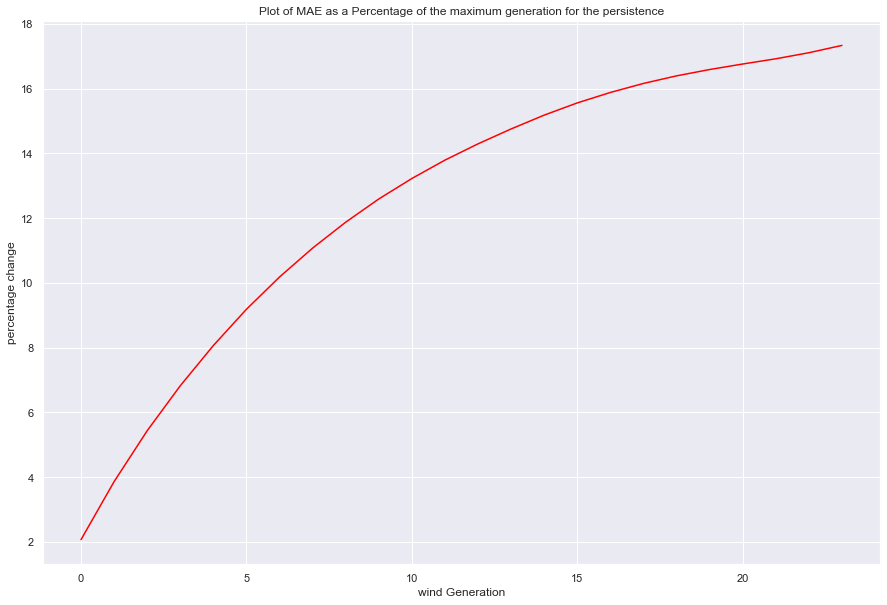

In [34]:
#Plot of the MAE as a percentage of the maximum generation for the persistence
plt.title("Plot of MAE as a Percentage of the maximum generation for the persistence")
plt.plot(maxPercentageList, color='red') #Plot the max percentage
plt.ylabel('percentage change') #Y-axis
plt.xlabel('wind Generation') #X-axis
plt.show() #Show graph 

# Question 10

In [35]:
#AutoRegressive Integrated Moving Average (ARIMA) model

import warnings                          #Import warning library to help ignore warnings                   
warnings.filterwarnings('ignore')

resetDataFrame = windDataSetIndex.reset_index() #Reset Index of Dataframe
a = [[1,2,3,4],[0],[1, 2, 3]] #List of p, d q
allCombinations = list(itertools.product(*a)) #All possible combinations
for i in range(len(allCombinations)):
    model = ARIMA(resetDataFrame['Wind Generation'], order= (allCombinations[i])) #Call the Arima function on the parameters
    model_fit = model.fit() #Fit Model
    print('ARIMA MODEL SUMMARY', model_fit.summary()) #Arima Summary
    
    print('BIC values', model_fit.bic) #Print AIC
    
    print('AIC values', model_fit.aic) #Print BIC
  
 

ARIMA MODEL SUMMARY                                SARIMAX Results                                
Dep. Variable:        Wind Generation   No. Observations:                 8760
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -50338.111
Date:                Mon, 14 Feb 2022   AIC                         100684.222
Time:                        23:52:48   BIC                         100712.534
Sample:                             0   HQIC                        100693.869
                               - 8760                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        903.3959    132.310      6.828      0.000     644.073    1162.718
ar.L1          0.9875      0.002    483.668      0.000       0.984       0.992
ma.L1          0.6019      0.002

ARIMA MODEL SUMMARY                                SARIMAX Results                                
Dep. Variable:        Wind Generation   No. Observations:                 8760
Model:                 ARIMA(2, 0, 3)   Log Likelihood              -49403.998
Date:                Mon, 14 Feb 2022   AIC                          98821.996
Time:                        23:53:04   BIC                          98871.541
Sample:                             0   HQIC                         98838.878
                               - 8760                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        903.3953     75.276     12.001      0.000     755.857    1050.934
ar.L1          1.6202      0.025     65.895      0.000       1.572       1.668
ar.L2         -0.6345      0.024

ARIMA MODEL SUMMARY                                SARIMAX Results                                
Dep. Variable:        Wind Generation   No. Observations:                 8760
Model:                 ARIMA(4, 0, 1)   Log Likelihood              -49404.315
Date:                Mon, 14 Feb 2022   AIC                          98822.630
Time:                        23:53:24   BIC                          98872.175
Sample:                             0   HQIC                         98839.512
                               - 8760                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        903.3953     75.549     11.958      0.000     755.322    1051.469
ar.L1          1.1655      0.391      2.981      0.003       0.399       1.932
ar.L2          0.1929      0.688